In [1]:
import glob,os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
plt.style.use('seaborn-colorblind')
import seaborn as sns
from scipy.stats import *
from functools import reduce

In [2]:
files = glob.glob('/oak/stanford/groups/mrivas/projects/degas-risk/final_results/v2/*prs/final*.tsv')
print('\n'.join(map(os.path.basename,files)))

final_test_dprs_results.tsv
final_valid_dprs_results.tsv
final_train_dprs_results.tsv
final_nbw_dprs_results.tsv
final_train_prs_results.tsv
final_test_prs_results.tsv
final_valid_prs_results.tsv
final_nbw_prs_results.tsv


In [3]:
cols=['n','beta2','auc','pearsonr','spearmanr']
data=reduce(lambda x,y: pd.merge(x, y, left_index=True, right_index=True),
            [pd.read_csv(f, sep='\t', index_col=0, skiprows=1, na_values='na', header=None,
                            names=['_'.join(os.path.basename(f).split('_')[1:3]+[s]) for s in cols]) 
             for f in files])
data.head()

,test_dprs_n,test_dprs_beta2,test_dprs_auc,test_dprs_pearsonr,test_dprs_spearmanr,valid_dprs_n,valid_dprs_beta2,valid_dprs_auc,valid_dprs_pearsonr,valid_dprs_spearmanr,...,valid_prs_n,valid_prs_beta2,valid_prs_auc,valid_prs_pearsonr,valid_prs_spearmanr,nbw_prs_n,nbw_prs_beta2,nbw_prs_auc,nbw_prs_pearsonr,nbw_prs_spearmanr
BIN1210,24282,0.983333,0.608605,NaN,-0.009706,12294,0.875311,0.608108,NaN,-0.010994,...,12294,0.840852,0.607850,NaN,-0.007376,8243,0.915600,0.609100,NaN,0.003130
BIN1677,36438,0.908820,0.629018,NaN,0.003875,18369,0.889935,0.628516,NaN,0.000415,...,18369,0.983477,0.628554,NaN,-0.006093,14204,1.098454,0.615234,NaN,-0.000852
BIN1920,30479,1.169779,0.574783,NaN,0.013269,15285,1.012157,0.578670,NaN,0.015001,...,15285,1.038704,0.578976,NaN,0.020121,10921,1.231047,0.557786,NaN,0.012575
BIN1930,28903,0.916910,0.604266,NaN,-0.007549,14517,1.026222,0.610663,NaN,0.010779,...,14517,1.076376,0.611006,NaN,0.019748,10488,1.108365,0.581392,NaN,0.012440
BIN1940,18606,1.181597,0.575600,NaN,0.006511,9400,0.959831,0.573745,NaN,-0.002398,...,9400,0.977494,0.573755,NaN,0.003294,7366,1.221815,0.567356,NaN,0.005875


In [4]:
z=np.load('/oak/stanford/groups/mrivas/projects/degas-risk/datasets/'+
          'train/v2/tsvd/all_beta_center_p1e-06_20200506_500PCs.npz')

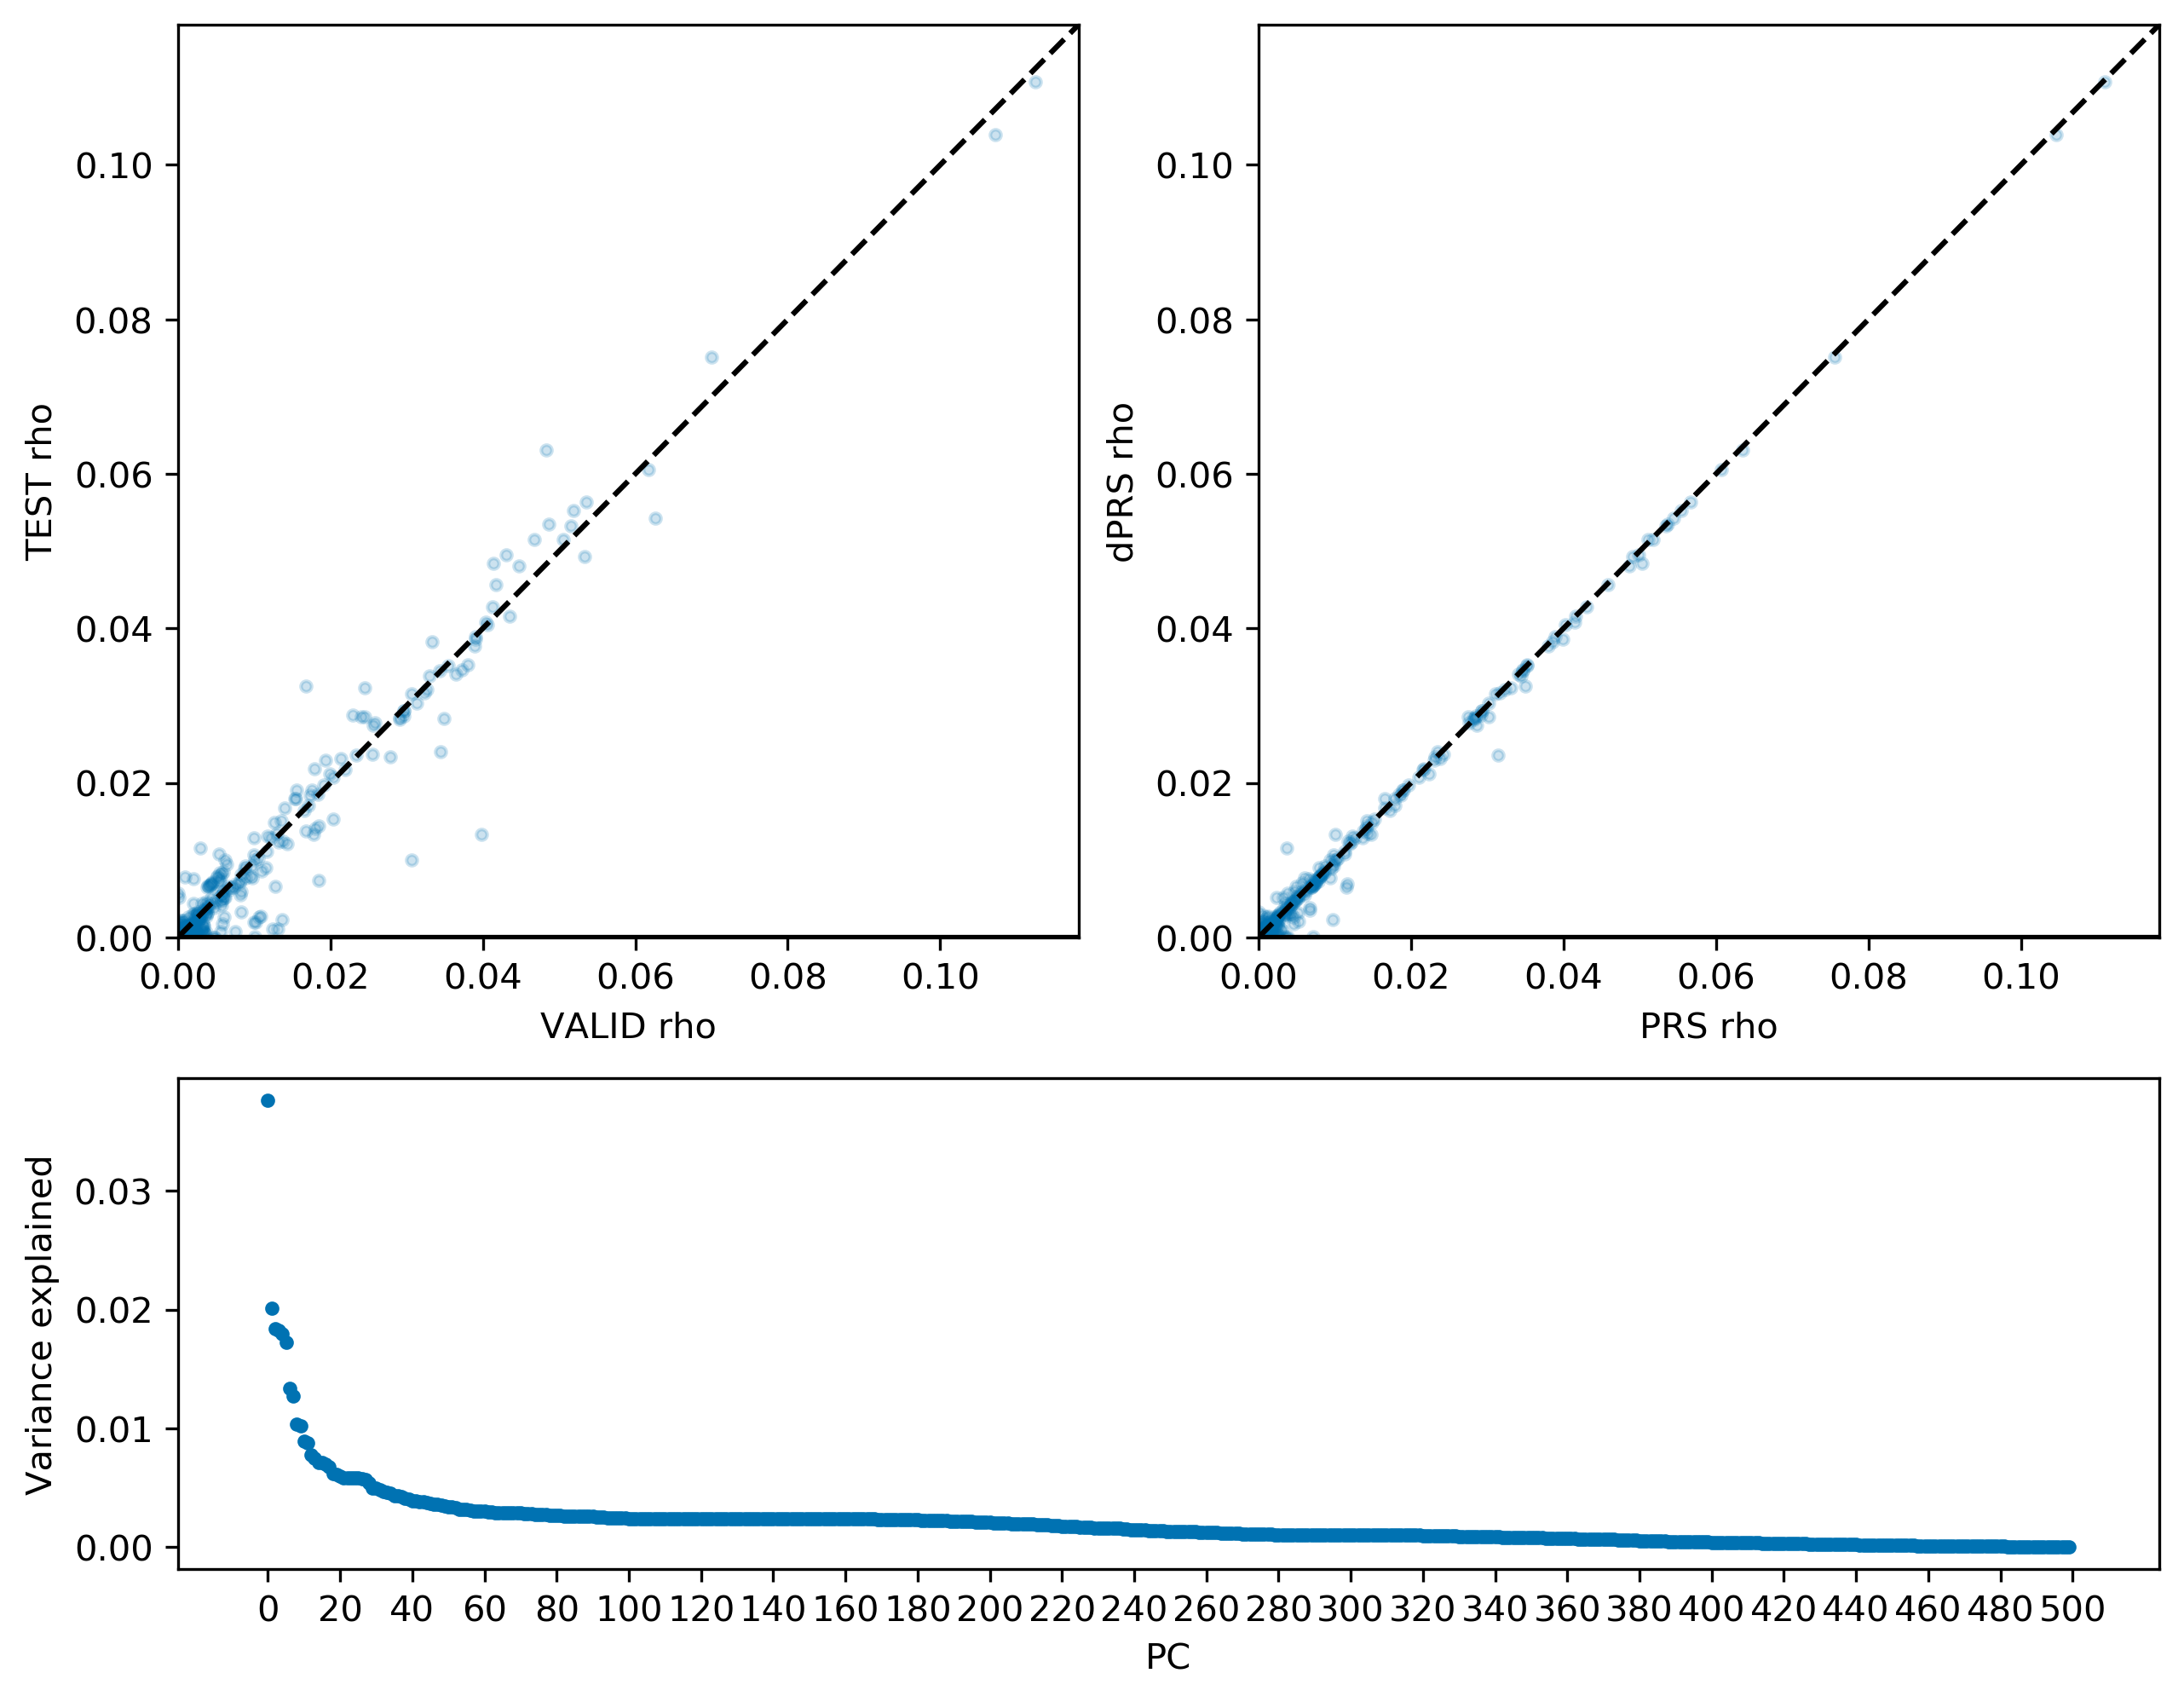

In [5]:
fig=plt.figure(figsize=(10,8),dpi=300)
grid=gs.GridSpec(8, 10, wspace=5, hspace=2)

# valid vs test
ax=plt.subplot(grid[:5,:5])
ax.plot(data['valid_dprs_spearmanr']**2, data['test_dprs_spearmanr']**2, '.', alpha=0.2)
xymax=max(ax.get_xlim()+ax.get_ylim())
ax.set_xlim(0, xymax); ax.set_ylim(0, xymax)
ax.plot([0,xymax], [0,xymax], 'k--')
ax.plot([0,xymax], [0,0], 'k-')
ax.set_xlabel('VALID rho')#+'$\rho$'+' ')
ax.set_ylabel('TEST rho')#+'$\rho$'+' ')

# dprs vs prs
ax=plt.subplot(grid[:5,5:])
ax.plot(data['test_prs_spearmanr']**2, data['test_dprs_spearmanr']**2, '.', alpha=0.2)
ax.set_xlim(0, xymax); ax.set_ylim(0, xymax)
ax.plot([0,xymax], [0,xymax], 'k--')
ax.plot([0,xymax], [0,0], 'k-')
ax.set_xlabel('PRS rho')#+'$\rho$'+' ')
ax.set_ylabel('dPRS rho')#+'$\rho$'+' ')

# scree plot
ax=plt.subplot(grid[5:,:])
ax.plot(np.arange(z['D'].shape[0]), z['variance_explained_ratio'], '.')
# ax.plot([300,300], ax.get_ylim(), 'k--', alpha=0.3)
ax.set_xticks(np.arange(0,z['D'].shape[0]+1,20))
ax.set_xlabel('PC')
ax.set_ylabel('Variance explained')
# ax.plot([0,z['D'].shape[0]],[1.0/z['V'].shape[0],1.0/z['V'].shape[0]], 'k--')

plt.show()

In [6]:
np.sum(z['variance_explained_ratio'][:500])

0.9994438866618676